##Importing the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [4]:
train_data = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv')

In [5]:
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

##Data Visualization and Analysis

###Train Dataset

In [6]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


###Univariate Analysis

In [9]:
# 2. Frequency Distribution for Categorical Variables
categorical_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
frequency_distributions = {var: train_df[var].value_counts() for var in categorical_vars}

####Bar Charts

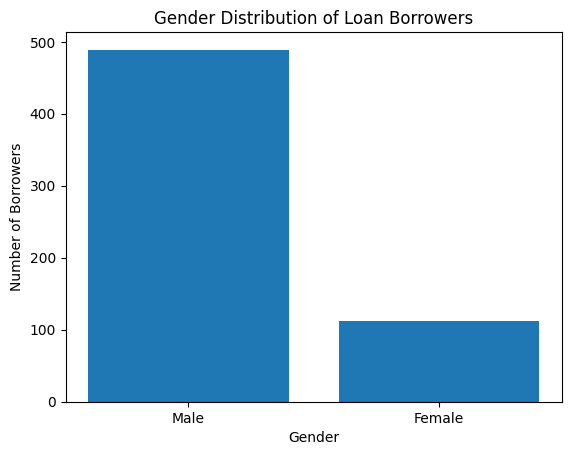

In [10]:
# Create a frequency table for the 'Gender' variable
gender_counts = train_df['Gender'].value_counts()

# Create a bar chart of the gender counts
plt.bar(gender_counts.index, gender_counts.values)

# Set the chart title and labels
plt.title('Gender Distribution of Loan Borrowers')
plt.xlabel('Gender')
plt.ylabel('Number of Borrowers')

# Show the chart
plt.show()

####Histograms

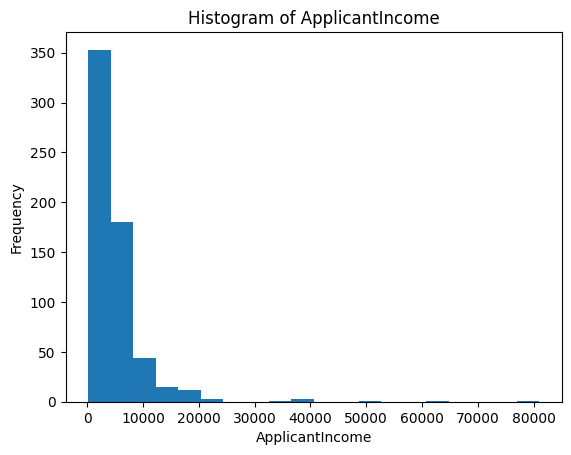

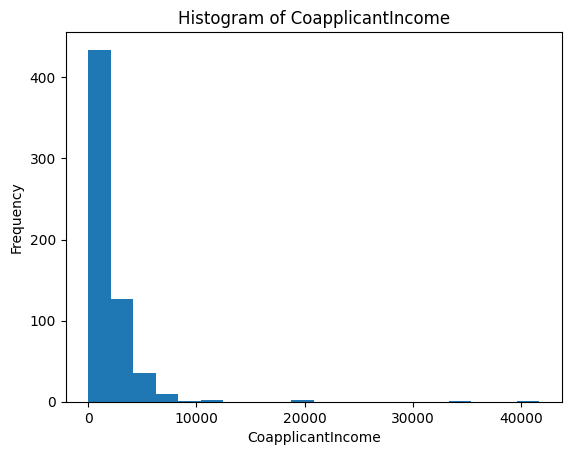

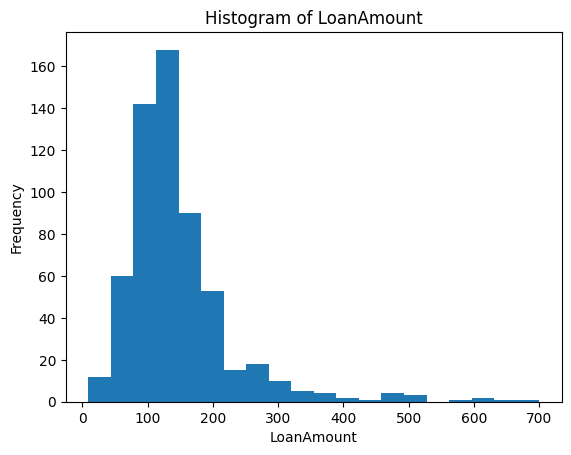

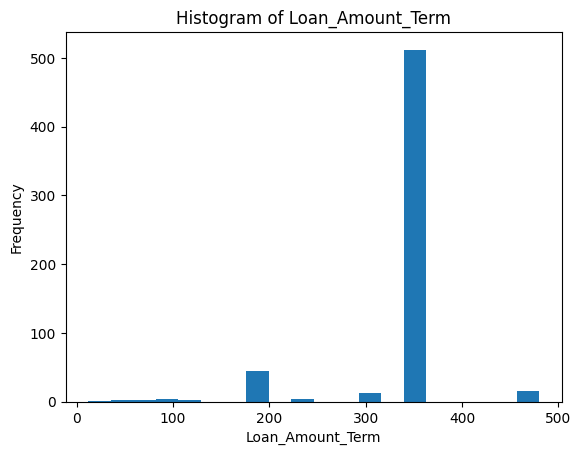

In [11]:
numerical_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for var in numerical_vars:
    plt.hist(train_df[var], bins=20)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

####Box Plots

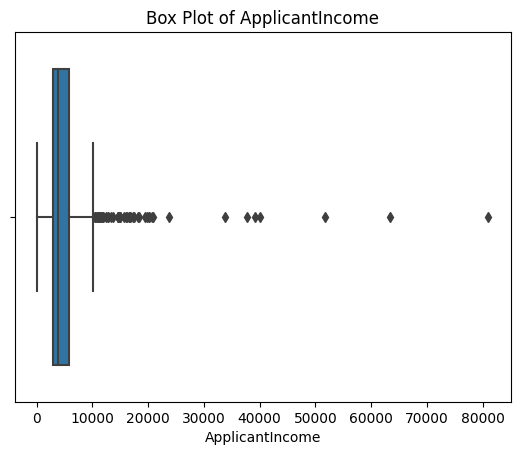

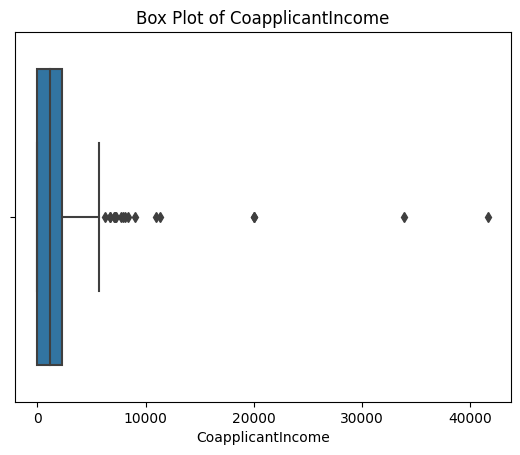

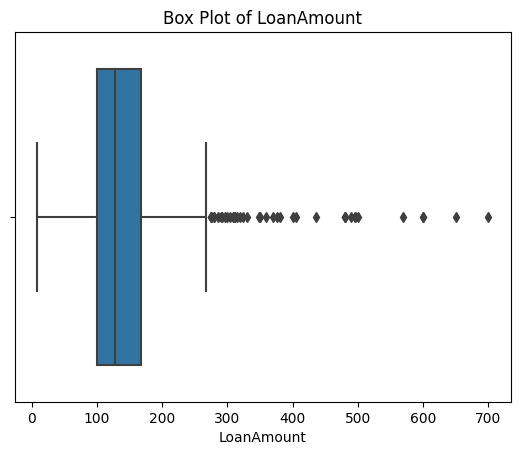

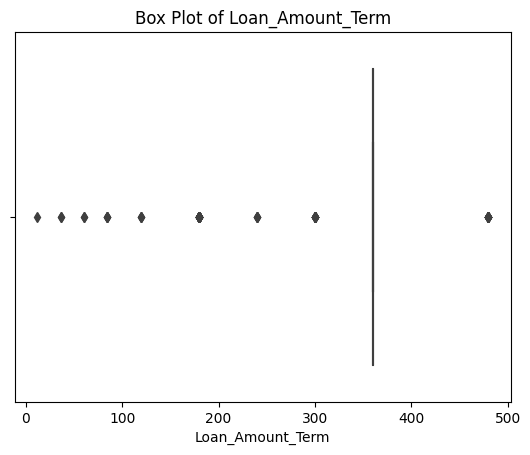

In [12]:
for var in numerical_vars:
    sns.boxplot(x=train_df[var])
    plt.title(f'Box Plot of {var}')
    plt.show()

####Pi-chart

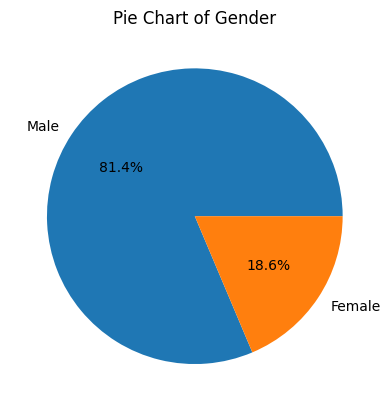

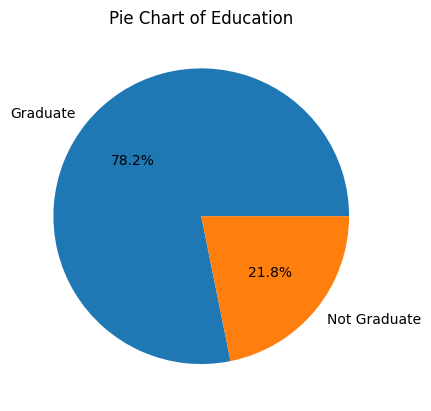

In [13]:
for var in ['Gender', 'Education']:
    train_df[var].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie Chart of {var}')
    plt.ylabel('')
    plt.show()

####Kernel Density Estimation (KDE)

<ipython-input-14-23680cb5b5c2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[var], shade=True)


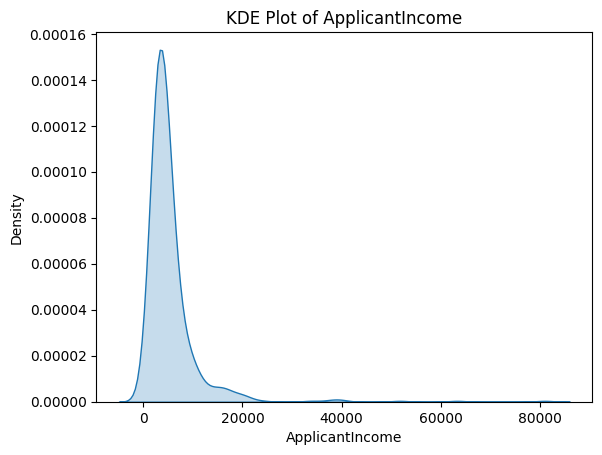

<ipython-input-14-23680cb5b5c2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[var], shade=True)


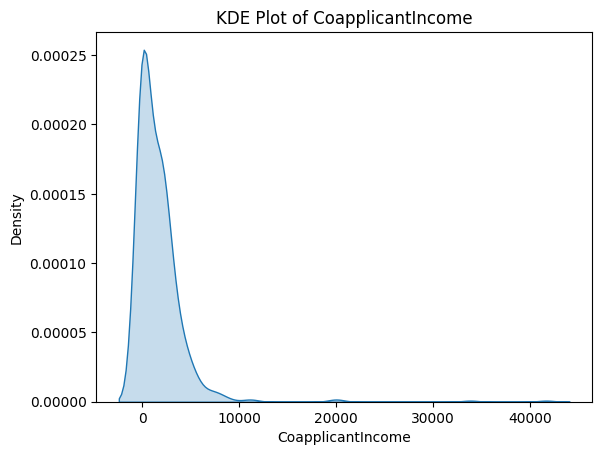

<ipython-input-14-23680cb5b5c2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[var], shade=True)


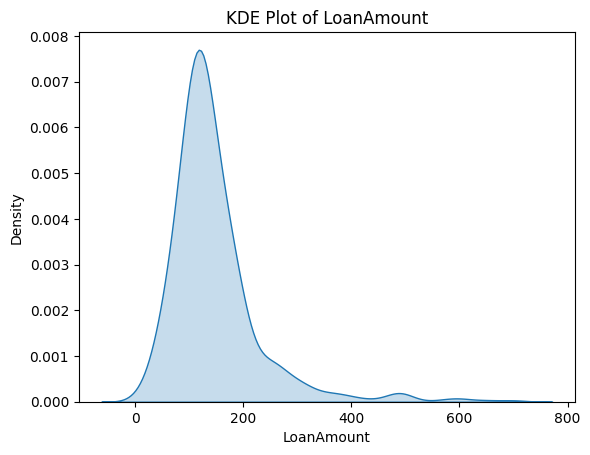

<ipython-input-14-23680cb5b5c2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[var], shade=True)


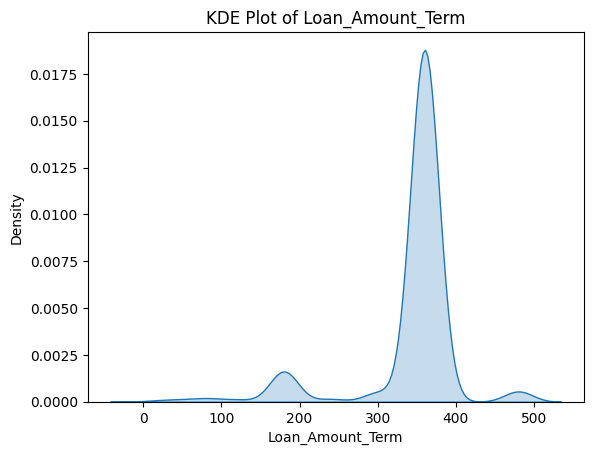

In [14]:
for var in numerical_vars:
    sns.kdeplot(train_df[var], shade=True)
    plt.title(f'KDE Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.show()

###Bivariate Analysis

####Correlation Matrix

<ipython-input-15-4f47176d587a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


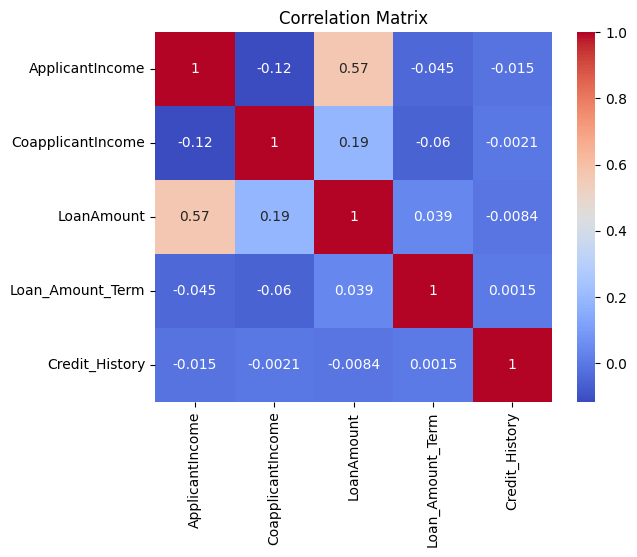

In [15]:
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

####Scatter Plot

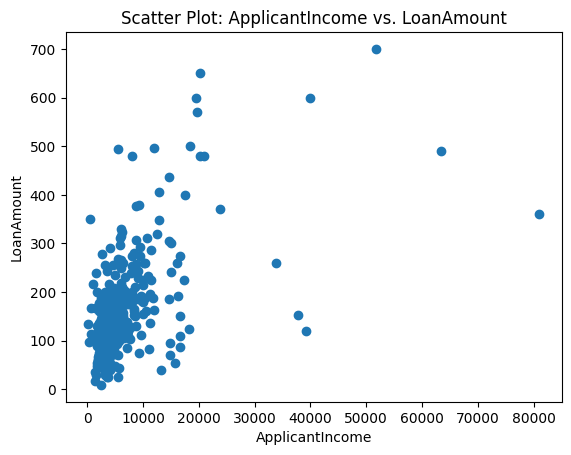

In [16]:
plt.scatter(train_df['ApplicantIncome'], train_df['LoanAmount'])
plt.title('Scatter Plot: ApplicantIncome vs. LoanAmount')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

####Stacked Bar Plots

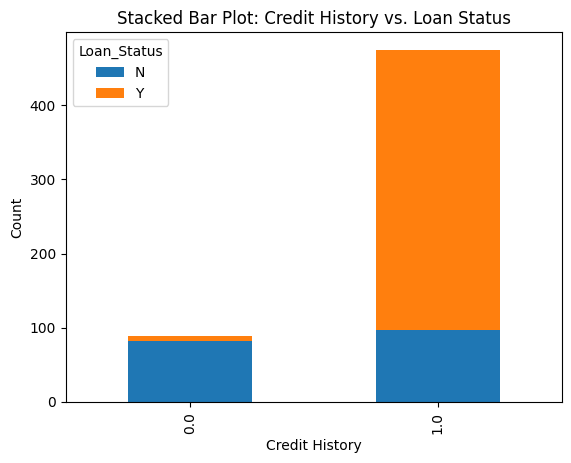

In [17]:
crosstab = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'])
crosstab.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot: Credit History vs. Loan Status')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

####Pair Plots

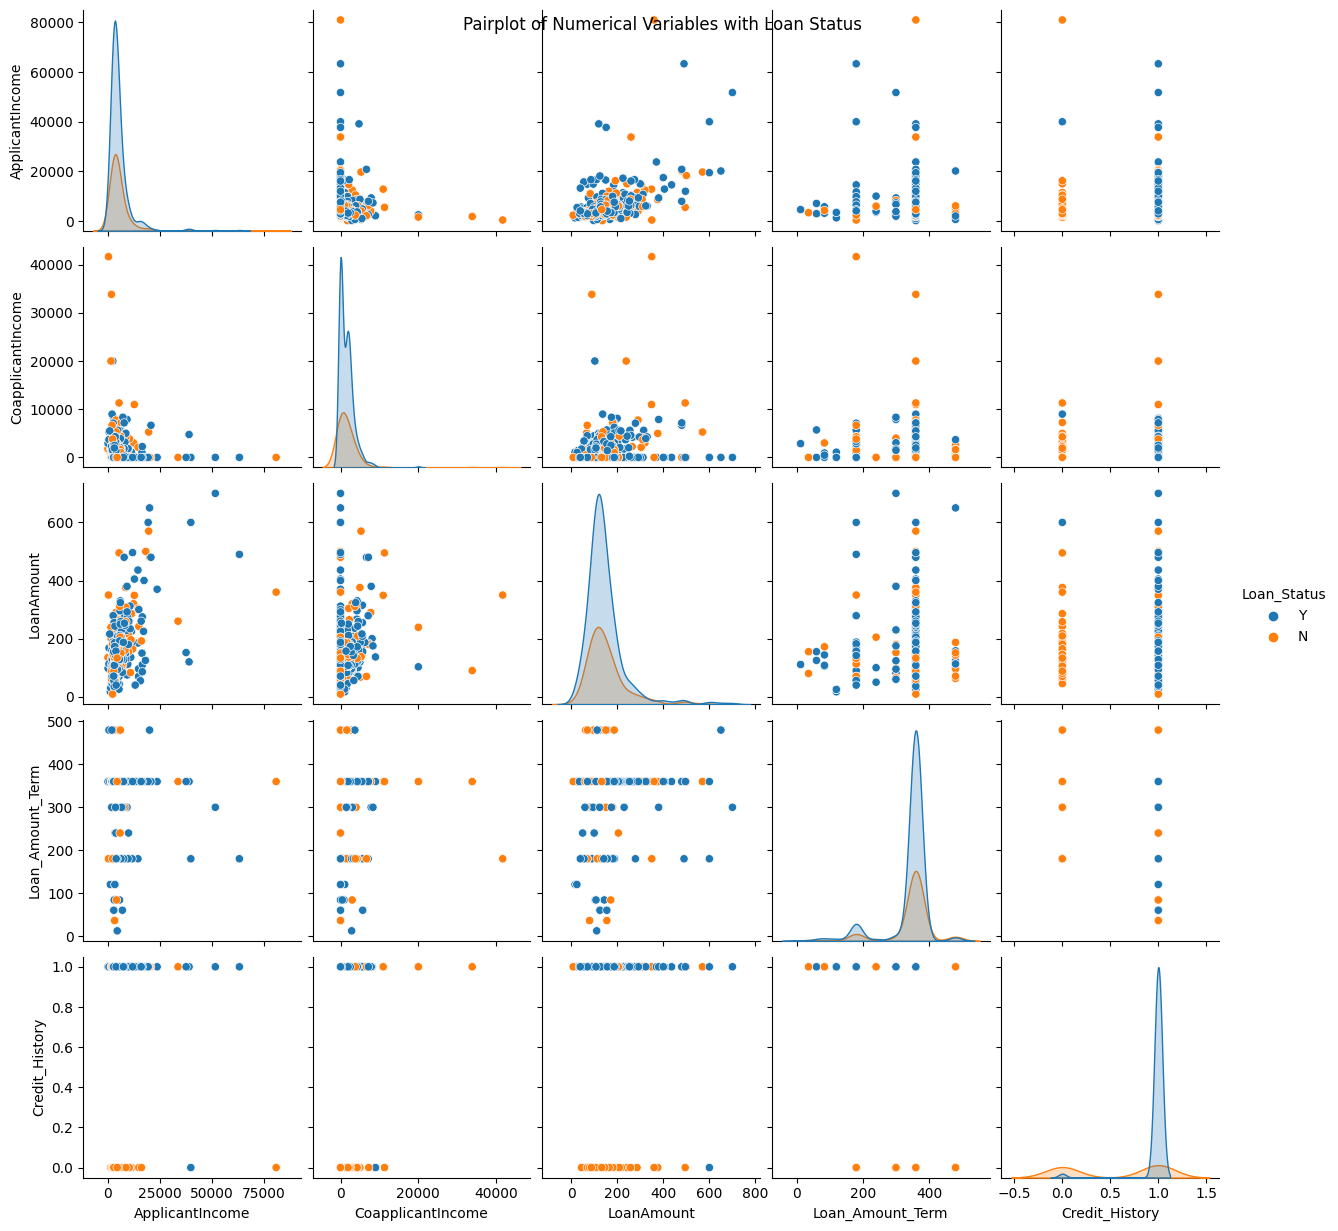

In [18]:
sns.pairplot(train_df, hue='Loan_Status', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables with Loan Status')
plt.show()

####Violin Plots

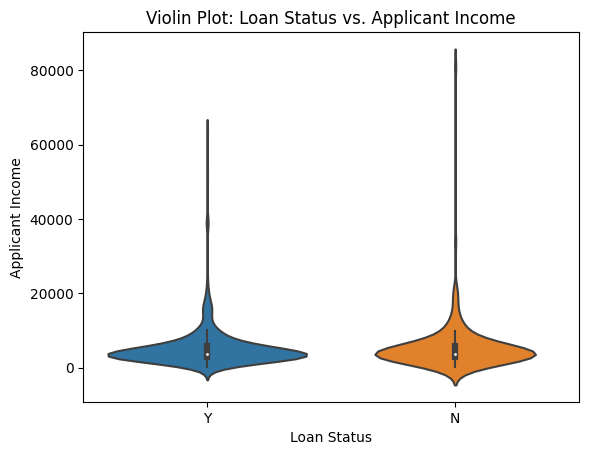

In [19]:
sns.violinplot(x='Loan_Status', y='ApplicantIncome', data=train_df)
plt.title('Violin Plot: Loan Status vs. Applicant Income')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

####Heat map for cross tabulation

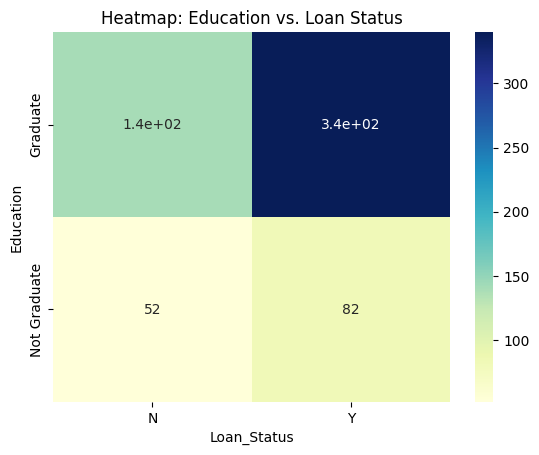

In [20]:
crosstab = pd.crosstab(train_df['Education'], train_df['Loan_Status'])
sns.heatmap(crosstab, annot=True, cmap="YlGnBu")
plt.title('Heatmap: Education vs. Loan Status')
plt.show()

####Regression Plot

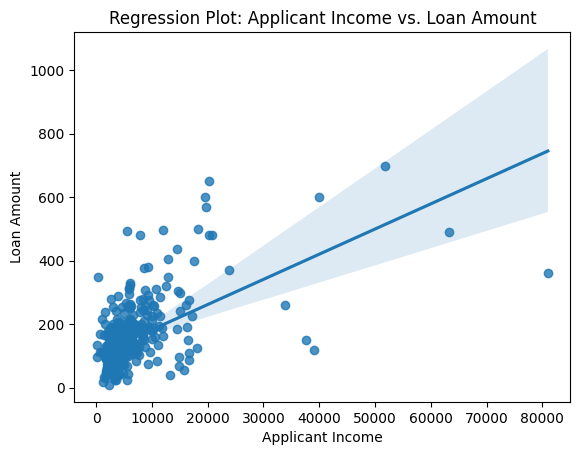

In [21]:
sns.regplot(x='ApplicantIncome', y='LoanAmount', data=train_df)
plt.title('Regression Plot: Applicant Income vs. Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

###Multivariate Analysis

<Axes: >

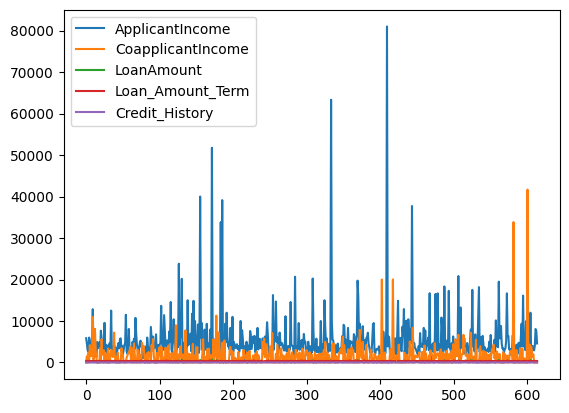

In [22]:
train_df.plot.line()

##Data pre-processing

###Check for NULL values and filling them

In [23]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
train_df['LoanAmount']=train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean())
train_df['Loan_Amount_Term']=train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean())
train_df['Credit_History']=train_df['Credit_History'].fillna(train_df['Credit_History'].mean())

In [25]:
train_df['Gender']=train_df['Gender'].fillna(train_df['Gender'].mode()[0])
train_df['Married']=train_df['Married'].fillna(train_df['Married'].mode()[0])
train_df['Dependents']=train_df['Dependents'].fillna(train_df['Dependents'].mode()[0])
train_df['Self_Employed']=train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0])

###Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['Gender'] = label_encoder.fit_transform(train_df['Gender'])
train_df['Married'] = label_encoder.fit_transform(train_df['Married'])
train_df['Dependents'] = label_encoder.fit_transform(train_df['Dependents'])
train_df['Education'] = label_encoder.fit_transform(train_df['Education'])
train_df['Self_Employed'] = label_encoder.fit_transform(train_df['Self_Employed'])
train_df['Property_Area'] = label_encoder.fit_transform(train_df['Property_Area'])
train_df['Loan_Status'] = label_encoder.fit_transform(train_df['Loan_Status'])

###Feature Scaling (Standardization)

In [27]:
train_df=train_df.drop(columns=["Loan_ID"],axis=1)

In [28]:
x=train_df.iloc[:,:-1]
y=train_df.Loan_Status

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.279851,0.45164,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.279851,0.45164,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.279851,0.45164,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.279851,0.45164,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.279851,0.45164,1.223298


In [30]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [31]:
from imblearn.under_sampling import RandomUnderSampler

# Assuming you have X and y as your feature matrix and target variable
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(x_scaled, y)

In [32]:
X_resampled.shape,x.shape, y.shape, y_resampled.shape

((384, 11), (614, 11), (614,), (384,))

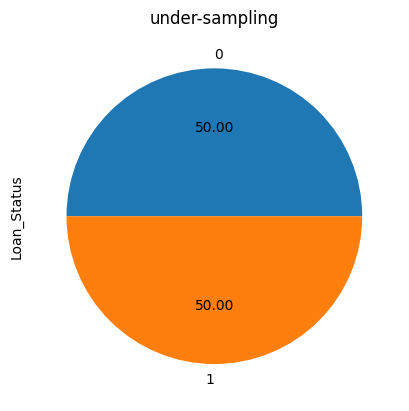

In [33]:
ax=y_resampled.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("under-sampling")

###Splitting the Data

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=10)

In [35]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((268, 11), (116, 11), (268,), (116,))

##Model Building

###Decision Tree Model

In [36]:
from sklearn.tree import DecisionTreeClassifier

model_1 = DecisionTreeClassifier(random_state=42)
model_1.fit(x_train, y_train)
model_1_predictions = model_1.predict(x_test)

In [37]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
print("Decision Tree Model:")
print("Accuracy:", accuracy_score(y_test, model_1_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, model_1_predictions))
print("Classification Report:\n", classification_report(y_test, model_1_predictions))

Decision Tree Model:
Accuracy: 0.6724137931034483
Confusion Matrix:
 [[39 20]
 [18 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67        59
           1       0.66      0.68      0.67        57

    accuracy                           0.67       116
   macro avg       0.67      0.67      0.67       116
weighted avg       0.67      0.67      0.67       116



####Hyperparameter tuning

In [39]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform Grid Search Cross Validation
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(x_train, y_train)

# Get the best parameters
best_params_dt = grid_search_dt.best_params_

# Train the Decision Tree model with the best parameters
final_dt_model = DecisionTreeClassifier(**best_params_dt, random_state=42)
final_dt_model.fit(x_train, y_train)

# Make predictions on the test data
dt_predictions = final_dt_model.predict(x_test)

# Evaluate the model
print("Decision Tree Model:")
print("Best Parameters:", best_params_dt)
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))


Decision Tree Model:
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.6637931034482759
Confusion Matrix:
 [[40 19]
 [20 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.68      0.67        59
           1       0.66      0.65      0.65        57

    accuracy                           0.66       116
   macro avg       0.66      0.66      0.66       116
weighted avg       0.66      0.66      0.66       116



####Validation

In [40]:
from sklearn.model_selection import cross_val_score

# Perform Cross-Validation
cv_scores_dt = cross_val_score(final_dt_model, x_train, y_train, cv=5, scoring='accuracy')

# Evaluate the model
print("Decision Tree Model:")
print("Best Parameters:", best_params_dt)
print("Cross-Validation Scores:", cv_scores_dt)
print("Mean CV Accuracy:", np.mean(cv_scores_dt))


Decision Tree Model:
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Cross-Validation Scores: [0.66666667 0.59259259 0.75925926 0.69811321 0.66037736]
Mean CV Accuracy: 0.6754018169112508


###Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(random_state=42)
model_2.fit(x_train, y_train)
model_2_predictions = model_2.predict(x_test)

# Calculate accuracy as a performance metric
print("Random Forest classifier:")
print("Accuracy:", accuracy_score(y_test, model_2_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, model_2_predictions))
print("Classification Report:\n", classification_report(y_test, model_2_predictions))

Random Forest classifier:
Accuracy: 0.6724137931034483
Confusion Matrix:
 [[34 25]
 [13 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.58      0.64        59
           1       0.64      0.77      0.70        57

    accuracy                           0.67       116
   macro avg       0.68      0.67      0.67       116
weighted avg       0.68      0.67      0.67       116



####Hyper-parameter tuning

In [42]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search Cross Validation
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Train the Random Forest model with the best parameters
final_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
final_rf_model.fit(x_train, y_train)

# Make predictions on the test data
rf_predictions = final_rf_model.predict(x_test)

# Evaluate the model
print("Random Forest Model:")
print("Best Parameters:", best_params_rf)
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Model:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.6982758620689655
Confusion Matrix:
 [[34 25]
 [10 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.58      0.66        59
           1       0.65      0.82      0.73        57

    accuracy                           0.70       116
   macro avg       0.71      0.70      0.69       116
weighted avg       0.71      0.70      0.69       116



####Validation

In [43]:
# Perform Cross-Validation
cv_scores_rf = cross_val_score(final_rf_model, x_train, y_train, cv=5, scoring='accuracy')

# Evaluate the model
print("Random Forest Model:")
print("Best Parameters:", best_params_rf)
print("Cross-Validation Scores:", cv_scores_rf)
print("Mean CV Accuracy:", np.mean(cv_scores_rf))


Random Forest Model:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Cross-Validation Scores: [0.74074074 0.62962963 0.77777778 0.81132075 0.66037736]
Mean CV Accuracy: 0.7239692522711391


###KNN Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

model_3 = KNeighborsClassifier()
model_3.fit(x_train, y_train)
model_3_predictions = model_3.predict(x_test)

# Calculate accuracy as a performance metric
print("KNN:")
print("Accuracy:", accuracy_score(y_test, model_3_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, model_3_predictions))
print("Classification Report:\n", classification_report(y_test, model_3_predictions))


KNN:
Accuracy: 0.6637931034482759
Confusion Matrix:
 [[31 28]
 [11 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.53      0.61        59
           1       0.62      0.81      0.70        57

    accuracy                           0.66       116
   macro avg       0.68      0.67      0.66       116
weighted avg       0.68      0.66      0.66       116



####Hyper-parameter tuning

In [45]:
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create the KNN model
knn_model = KNeighborsClassifier()

# Perform Grid Search Cross Validation
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)

# Get the best parameters
best_params_knn = grid_search_knn.best_params_

# Train the KNN model with the best parameters
final_knn_model = KNeighborsClassifier(**best_params_knn)
final_knn_model.fit(x_train, y_train)

# Make predictions on the test data
knn_predictions = final_knn_model.predict(x_test)

# Evaluate the model
print("KNN Model:")
print("Best Parameters:", best_params_knn)
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))

KNN Model:
Best Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Accuracy: 0.6379310344827587
Confusion Matrix:
 [[30 29]
 [13 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.51      0.59        59
           1       0.60      0.77      0.68        57

    accuracy                           0.64       116
   macro avg       0.65      0.64      0.63       116
weighted avg       0.65      0.64      0.63       116



####Validation

In [46]:
# Perform Cross-Validation
cv_scores_knn = cross_val_score(final_knn_model, x_train, y_train, cv=5, scoring='accuracy')

# Evaluate the model
print("KNN Model:")
print("Best Parameters:", best_params_knn)
print("Cross-Validation Scores:", cv_scores_knn)
print("Mean CV Accuracy:", np.mean(cv_scores_knn))


KNN Model:
Best Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Cross-Validation Scores: [0.66666667 0.72222222 0.7962963  0.75471698 0.71698113]
Mean CV Accuracy: 0.7313766596785464


###XG Boost classifier

In [47]:
from xgboost import XGBClassifier

model_4 = XGBClassifier(random_state=42)
model_4.fit(x_train, y_train)
model_4_predictions = model_4.predict(x_test)

# Calculate accuracy as a performance metric
print("XG Boost:")
print("Accuracy:", accuracy_score(y_test, model_4_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, model_4_predictions))
print("Classification Report:\n", classification_report(y_test, model_4_predictions))


XG Boost:
Accuracy: 0.7155172413793104
Confusion Matrix:
 [[37 22]
 [11 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.63      0.69        59
           1       0.68      0.81      0.74        57

    accuracy                           0.72       116
   macro avg       0.72      0.72      0.71       116
weighted avg       0.72      0.72      0.71       116



####Hyper-parameter tuning

In [48]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Perform Grid Search Cross Validation
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(x_train, y_train)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_

# Train the XGBoost model with the best parameters
final_xgb_model = XGBClassifier(**best_params_xgb, random_state=42)
final_xgb_model.fit(x_train, y_train)

# Make predictions on the test data
xgb_predictions = final_xgb_model.predict(x_test)

# Evaluate the model
print("XGBoost Model:")
print("Best Parameters:", best_params_xgb)
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))

XGBoost Model:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Accuracy: 0.7155172413793104
Confusion Matrix:
 [[35 24]
 [ 9 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.59      0.68        59
           1       0.67      0.84      0.74        57

    accuracy                           0.72       116
   macro avg       0.73      0.72      0.71       116
weighted avg       0.73      0.72      0.71       116



####Validation

In [49]:
cv_scores_xgb = cross_val_score(final_xgb_model, x_train, y_train, cv=5, scoring='accuracy')

# Evaluate the model
print("XGBoost Model:")
print("Best Parameters:", best_params_xgb)
print("Cross-Validation Scores:", cv_scores_xgb)
print("Mean CV Accuracy:", np.mean(cv_scores_xgb))


XGBoost Model:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Cross-Validation Scores: [0.66666667 0.66666667 0.75925926 0.75471698 0.62264151]
Mean CV Accuracy: 0.693990216631726


###Ensemble Model

In [50]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [51]:
# Create the ensemble model using a VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('DecisionTree', model_1),
        ('RandomForest', model_2),
        ('KNN', model_3),
        ('XGBoost', model_4)
    ],
    voting='hard'  # 'hard' for majority class voting
)

# Train the ensemble model on the undersampled training data
ensemble_model.fit(x_train, y_train)

# Make predictions on the test data
ensemble_predictions = ensemble_model.predict(x_test)

# Calculate accuracy as a performance metric for the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Model Accuracy:", ensemble_accuracy)

print("Ensemble Model:")
print("Accuracy:", accuracy_score(y_test, ensemble_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, ensemble_predictions))
print("Classification Report:\n", classification_report(y_test, ensemble_predictions))

Ensemble Model Accuracy: 0.6810344827586207
Ensemble Model:
Accuracy: 0.6810344827586207
Confusion Matrix:
 [[36 23]
 [14 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.61      0.66        59
           1       0.65      0.75      0.70        57

    accuracy                           0.68       116
   macro avg       0.69      0.68      0.68       116
weighted avg       0.69      0.68      0.68       116

